**NETFLIX MOVIE RATING**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('datasets/Netflix_Dataset_Rating.csv')

In [5]:
df.head()

,User_ID,Rating,Movie_ID
0,712664,5,3
1,1331154,4,3
2,2632461,3,3
3,44937,5,3
4,656399,4,3


In [6]:
#check for missing values
df.isnull().sum()

User_ID     0
Rating      0
Movie_ID    0
dtype: int64

In [7]:
df.dropna()

,User_ID,Rating,Movie_ID
0,712664,5,3
1,1331154,4,3
2,2632461,3,3
3,44937,5,3
4,656399,4,3
...,...,...,...
1048570,1106962,4,299
1048571,830808,4,299
1048572,1321416,5,299
1048573,2541550,3,299


In [9]:
#coverting rating col to numeric if not already
df['Rating'] = pd.to_numeric(df['Rating'])

In [10]:
df = df.drop_duplicates()

In [11]:
df.head()

,User_ID,Rating,Movie_ID
0,712664,5,3
1,1331154,4,3
2,2632461,3,3
3,44937,5,3
4,656399,4,3


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   User_ID   1048575 non-null  int64
 1   Rating    1048575 non-null  int64
 2   Movie_ID  1048575 non-null  int64
dtypes: int64(3)
memory usage: 24.0 MB


In [14]:
df.describe()

,User_ID,Rating,Movie_ID
count,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.321036e+06,3.637543e+00,1.736547e+02
std,7.643317e+05,1.055057e+00,8.798259e+01
min,6.000000e+00,1.000000e+00,3.000000e+00
25%,6.602940e+05,3.000000e+00,1.080000e+02
50%,1.316286e+06,4.000000e+00,1.910000e+02
75%,1.983493e+06,4.000000e+00,2.520000e+02
max,2.649429e+06,5.000000e+00,2.990000e+02


In [15]:
df.shape

(1048575, 3)

__Calculate Summary Statistics__

In [24]:
Mean_Rating = df['Rating'].mean()
Median_Rating = df['Rating'].median()
Mode_Rating = df['Rating'].mode()


In [25]:
print(f'Mean Rating: {Mean_Rating}')
print(f'Median Rating: {Median_Rating}')
print(f'Mode Rating: {Mode_Rating}')

Mean Rating: 3.637543332618077
Median Rating: 4.0
Mode Rating: 0    4
Name: Rating, dtype: int64


**Visualizations**

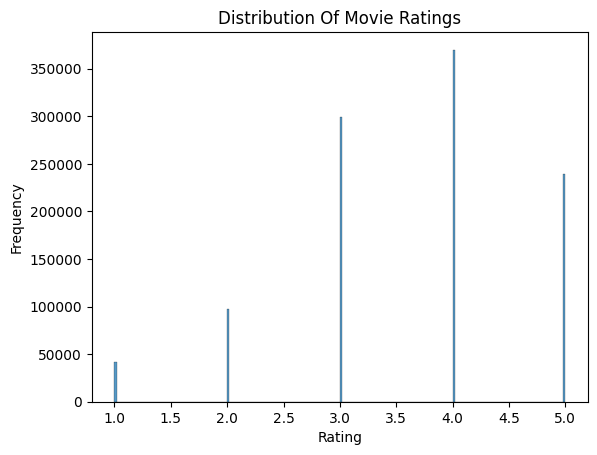

In [31]:
sns.histplot(df['Rating'])
plt.title('Distribution Of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

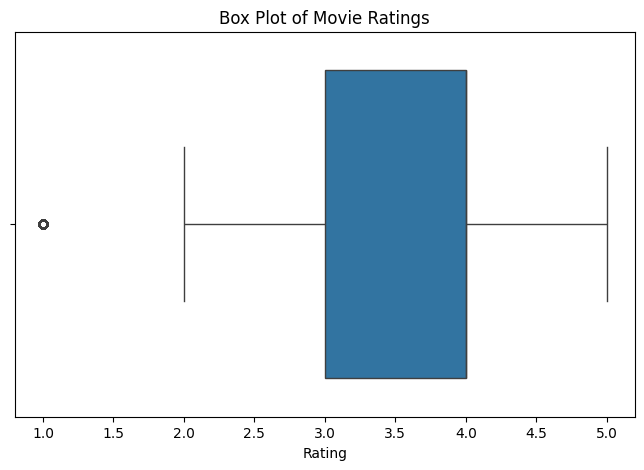

In [32]:
# Box plot of ratings
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Rating'])
plt.title('Box Plot of Movie Ratings')
plt.show()

**Top-Rated Movies**

In [34]:
df

,User_ID,Rating,Movie_ID
0,712664,5,3
1,1331154,4,3
2,2632461,3,3
3,44937,5,3
4,656399,4,3
...,...,...,...
1048570,1106962,4,299
1048571,830808,4,299
1048572,1321416,5,299
1048573,2541550,3,299


In [39]:
df.duplicated


<bound method DataFrame.duplicated of          User_ID  Rating  Movie_ID
0         712664       5         3
1        1331154       4         3
2        2632461       3         3
3          44937       5         3
4         656399       4         3
...          ...     ...       ...
1048570  1106962       4       299
1048571   830808       4       299
1048572  1321416       5       299
1048573  2541550       3       299
1048574  1239283       4       299

[1048575 rows x 3 columns]>

In [41]:
df.drop_duplicates(subset=['Movie_ID','Rating'])

,User_ID,Rating,Movie_ID
0,712664,5,3
1,1331154,4,3
2,2632461,3,3
5,439011,1,3
10,701730,2,3
...,...,...,...
1001665,1392773,4,299
1001666,716091,2,299
1001668,1822148,3,299
1001670,1402412,5,299


In [42]:
top_rated_movies = df[['Movie_ID','Rating']].sort_values(by = 'Rating', ascending = False).head(10)
print('Top 10 Movies by Rating')
print(top_rated_movies)

Top 10 Movies by Rating
         Movie_ID  Rating
1048564       299       5
1048553       299       5
1048556       299       5
909379        275       5
31              3       5
1048572       299       5
16              3       5
17              3       5
22              3       5
23              3       5


Text(0.5, 1.0, 'Distribution of Movie Ratings')

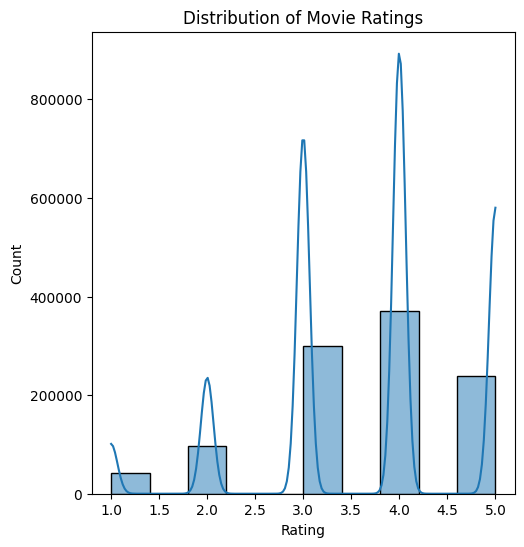

In [43]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Rating'], bins=10, kde=True)
plt.title('Distribution of Movie Ratings')

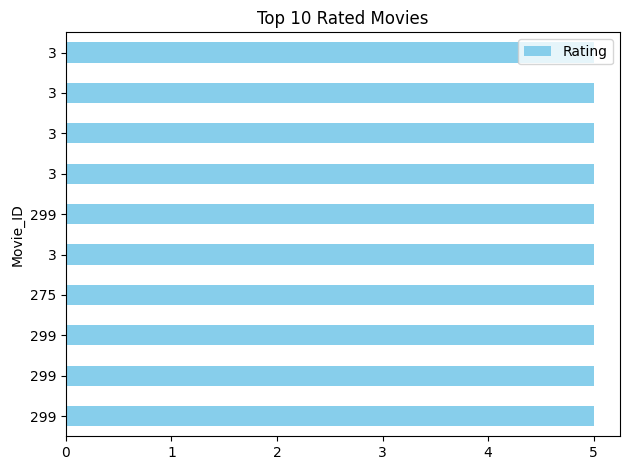

In [47]:

top_rated_movies.plot(kind='barh', x='Movie_ID', y='Rating', color='skyblue')
plt.title('Top 10 Rated Movies')
plt.tight_layout()
plt.show()